## 1. Import Library


In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection, preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

np.random.seed(123) #for reprodicible results
%matplotlib inline

## 2. Data Preparation

In [64]:
df = pd.read_csv('./Fixed_news_dataset.csv')
## Link data: https://www.kaggle.com/datasets/sarahhimeko/vietnamese-online-news-csv-dataset

In [65]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,author,content,picture_count,processed,source,title,topic,url,crawled_at
0,0,0,218270,NaN,"Chiều 31/7, Công an tỉnh Thừa Thiên - Huế thôn...",3,0,docbao.vn,"Tên cướp tiệm vàng Huế đại uý công an, công tá...",Pháp luật,https://docbao.vn/phap-luat/ten-cuop-tiem-vang...,2022-08-01 09:09:22.817308
1,1,1,218269,doãn hằng,"Gần đây, Thứ trưởng Bộ Phát triển Kỹ thuật số,...",1,0,vtc.vn,"Bỏ mạng 5G, Nga tiến thẳng 4G 6G",Sức khỏe - Đời sống,https://vtc.vn/bo-qua-mang-5g-nga-tien-thang-t...,2022-08-01 09:09:21.181469
2,2,2,218268,NaN,"Kết thi nghiệp THPT 2022 trung bình môn toán, ...",3,0,thanhnien.vn,"Địa phương đứng đầu tổng 3 môn văn, toán, ngoạ...",Giáo dục,https://thanhnien.vn/dia-phuong-nao-dung-dau-c...,2022-08-01 09:09:15.311901
3,3,3,218267,NaN,Thống đốc Kentucky Andy Beshear hôm 31/7 đợt m...,1,0,vnexpress,Người chết mưa lũ 'nghìn một' Mỹ 28,Thế giới,https://vnexpress.net/nguoi-chet-trong-mua-lu-...,2022-08-01 09:09:02.211498
4,4,4,218266,mi lan,Vụ tai nạn giao thông liên hoàn phố đi Tam Bạc...,12,0,soha,"Hải Phòng: Hình ảnh xe ""điên"" tai nạn liên hoà...",Thời sự,https://soha.vn/hai-phong-hinh-anh-xe-dien-gay...,2022-08-01 09:09:01.601170


In [66]:
df = df[['content', 'topic']]

Find all the categories and its length

In [67]:
topic = df['topic'].unique()

for i in range(len(topic)):
    print(f"{topic[i]}: {len(df[df['topic'] == topic[i]])}")

Pháp luật: 10807
Sức khỏe - Đời sống: 25578
Giáo dục: 8166
Thế giới: 17386
Thời sự: 16974
Văn hóa - Giải trí: 32040
Thể thao: 22549
Xã hội: 16630
Bất động sản: 1532
Công nghệ: 4333
Kinh tế: 5581
Kinh doanh - Tài chính: 11175
Bạn đọc: 1820
Chính trị: 4113
Quốc phòng: 1356
Xe: 4496
Pháp luật: 3


In [68]:
len(df[df['topic'] == "Giáo dục"]), len(df[df['topic'] == "Pháp luật"])

(8166, 10807)

In [69]:
df = pd.concat([df[df['topic'] == "Giáo dục"], df[df['topic'] == "Pháp luật"]])

In [70]:
df

,content,topic
2,"Kết thi nghiệp THPT 2022 trung bình môn toán, ...",Giáo dục
43,"Đối học sinh, lứa đa nghịch ngợm, hiếu động, l...",Giáo dục
66,"Năm 2008, 24 trường Ivy League, giáo sư Willia...",Giáo dục
109,NaN,Giáo dục
228,"Tối 31.7, Đại học Quốc gia Hà Nội gửi công văn...",Giáo dục
...,...,...
184518,"Ngày 7/6, Công an Phú Nhuận phối hợp đơn vị ng...",Pháp luật
184520,"Ngày 7/6, Cơ quan Cảnh sát tra Bộ Công an quyế...",Pháp luật
184522,Công ty CP phát triển Nam Sài Gòn (Sadeco) côn...,Pháp luật
184534,"Chiều 7/6, Khoa Công an Phú Nhuận phối hợp Côn...",Pháp luật


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18973 entries, 2 to 184535
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  18278 non-null  object
 1   topic    18973 non-null  object
dtypes: object(2)
memory usage: 444.7+ KB


In [72]:
df = df.dropna()

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18278 entries, 2 to 184535
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  18278 non-null  object
 1   topic    18278 non-null  object
dtypes: object(2)
memory usage: 428.4+ KB


In [74]:
size_edu = df[df['topic'] == 'Giáo dục'].shape[0]
size_law = df[df['topic'] == 'Pháp luật'].shape[0]
print('Number of edu documents: %s' %size_edu)
print('Number of law documents: %s' %size_law)

Number of edu documents: 7631
Number of law documents: 10647


In [75]:
# split the dataset into training and test datasets
train_x, test_x, train_y, test_y = model_selection.train_test_split(df['content'], df['topic'])

# label encode the target variable, encode labels to 0 or 1
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)
print('["Giáo dục" "Pháp luật"] categories corresponds to %s categories' %encoder.transform(["Giáo dục", "Pháp luật"]))

["Giáo dục" "Pháp luật"] categories corresponds to [0 1] categories


Show the information of the train and test set

In [76]:
print(f"The train_x: {train_x.shape}")
print(f"The train_y: {train_y.shape}")
print(f"The test_x: {test_x.shape}")
print(f"The test_y: {test_y.shape}")

The train_x: (13708,)
The train_y: (13708,)
The test_x: (4570,)
The test_y: (4570,)


### 2.4 - TF-IDF embedding

In [77]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['content'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xtest_tfidf =  tfidf_vect.transform(test_x)

In [78]:
# Getting transformed training and testing dataset
print('Number of training documents: %s' %str(xtrain_tfidf.shape[0]))
print('Number of testing documents: %s' %str(xtest_tfidf.shape[0]))
print('Number of features of each document: %s' %str(xtrain_tfidf.shape[1]))
print('xtrain_tfidf shape: %s' %str(xtrain_tfidf.shape))
print('train_y shape: %s' %str(train_y.shape))
print('xtest_tfidf shape: %s' %str(xtest_tfidf.shape))
print('test_y shape: %s' %str(test_y.shape))

Number of training documents: 13708
Number of testing documents: 4570
Number of features of each document: 5000
xtrain_tfidf shape: (13708, 5000)
train_y shape: (13708,)
xtest_tfidf shape: (4570, 5000)
test_y shape: (4570,)


Transpose the training and testing numpy-array, and expand the shape of the label array in the axis=0 position.

In [79]:
train_y = np.expand_dims(train_y, axis=0)
test_y = np.expand_dims(test_y, axis=0)

# for convenience in this exercise, we also use toarray() to convert sparse to dense matrix
xtrain_tfidf =  xtrain_tfidf.T.toarray()
xtest_tfidf =  xtest_tfidf.T.toarray()

In [80]:
# New shape
print('xtrain_tfidf shape: %s' %str(xtrain_tfidf.shape))
print('train_y shape: %s' %str(train_y.shape))
print('xtest_tfidf shape: %s' %str(xtest_tfidf.shape))
print('test_y shape: %s' %str(test_y.shape))

xtrain_tfidf shape: (5000, 13708)
train_y shape: (1, 13708)
xtest_tfidf shape: (5000, 4570)
test_y shape: (1, 4570)


## 3 - General Architecture of the learning algorithm


## 4 - Building the parts of our algorithm

### 4.1 - Helper functions

In [81]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    :type z: np.arrays - A scalar or numpy array of any size
    :rtype: np.single - The output of the sigmoid function
    """
    s = 1/(1+np.exp(-z))
    return s


### 4.2 - Initializing parameters

In [82]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.


    :type dim: size of the w vector we want (or number of parameters in this case)
    :rtype w: initialized vector of shape (dim, 1)
    :rtype b: initialized scalar (corresponds to the bias)
    """

    w = np.zeros((dim,1))
    b = 0.

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

### 4.3 - Forward and Backward propagation

In [83]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    """

    m = np.single(X.shape[1])

    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X) + b)                                    # compute activation
    cost = -(1/m) * (np.sum((Y*np.log(A))+ ((1-Y)*np.log(1-A))))

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1/m)*(np.dot(X,(A-Y).T))
    db = (1/m)*(np.sum(A-Y))

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost

### 4.4 - Optimization

In [84]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector, of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    """

    costs = []

    for i in range(num_iterations):


        # Cost and gradient calculation
        grads, cost = propagate(w,b,X,Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        w = w - learning_rate*dw
        b = b - learning_rate*db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

### 4.5 - Predict

In [85]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1,m), dtype=np.intc)
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a news being present
    A = sigmoid(np.dot(w.T,X) + b)

    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0][i] > 0.5):
            Y_prediction[0][i] = 1
        else:
            Y_prediction[0][i] = 0

    assert(Y_prediction.shape == (1, m))

    return Y_prediction, A

## 5 - Merge all functions into a model

In [86]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w,b,X_test)[0]
    Y_prediction_train = predict(w,b,X_train)[0]

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [87]:
d = model(xtrain_tfidf, train_y, xtest_tfidf, test_y, num_iterations = 3000, learning_rate = .5, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.438719
Cost after iteration 200: 0.336862
Cost after iteration 300: 0.281640
Cost after iteration 400: 0.246402
Cost after iteration 500: 0.221576
Cost after iteration 600: 0.202933
Cost after iteration 700: 0.188306
Cost after iteration 800: 0.176459
Cost after iteration 900: 0.166632
Cost after iteration 1000: 0.158323
Cost after iteration 1100: 0.151192
Cost after iteration 1200: 0.144993
Cost after iteration 1300: 0.139547
Cost after iteration 1400: 0.134720
Cost after iteration 1500: 0.130408
Cost after iteration 1600: 0.126529
Cost after iteration 1700: 0.123019
Cost after iteration 1800: 0.119824
Cost after iteration 1900: 0.116904
Cost after iteration 2000: 0.114222
Cost after iteration 2100: 0.111749
Cost after iteration 2200: 0.109461
Cost after iteration 2300: 0.107336
Cost after iteration 2400: 0.105358
Cost after iteration 2500: 0.103510
Cost after iteration 2600: 0.101780
Cost after iteration 2700: 0.100156
Cost

In [101]:
#News that was wrongly classified.
for index in range(len(test_y[0])):
  true = test_y[0][index]
  pred = d['Y_prediction_test'][0][index]
  if encoder.inverse_transform([true]) != encoder.inverse_transform([pred]):
    print('------------------------------------------------------------')
    print(list(test_x[index:index+1])[0])
    print('This is "%s" news, you predicted it is "%s" news' %(encoder.inverse_transform([true]), encoder.inverse_transform([pred])))
    print('------------------------------------------------------------')



------------------------------------------------------------
Chương trình thực hiện phạm vi toàn quốc 2021 2025. Mục tiêu tổng quát Chương trình phát triển lâm nghiệp thực trở thành ngành kinh tế-kỹ thuật hướng hiện đại, hiệu lực, hiệu sức cạnh tranh cao, liên kết chuỗi phát triển rừng, bảo vệ rừng, sử dụng rừng chế biến thương mại lâm sản; quản lý, bảo vệ, phát triển sử dụng bền vững diện tích rừng diện tích đất quy hoạch phát triển lâm nghiệp; phát huy tiềm năng, vai trò tác dụng rừng đóng góp quan trọng phát triển kinh tế-xã hội; góp làm, nâng thu nhập dân gắn bảo vệ môi trường sinh thái, bảo tồn đa dạng sinh học hệ sinh thái rừng, cường khả năng ứng biến đổi khí hậu, thiểu tác động tiêu cực thiên tai, phát thải khí kính, hấp thụ, lưu carbon rừng, góp thực hiện cam kết Việt Nam Hội nghị 26 tham gia công ước khung Liên Hợp Quốc biến đổi khí hậu (COP26); góp bảo vệ quốc phòng, an ninh. Bảo vệ, phát triển bền vững toàn diện tích rừng hiện Chương trình mục tiêu bảo vệ phát triển bền vữn

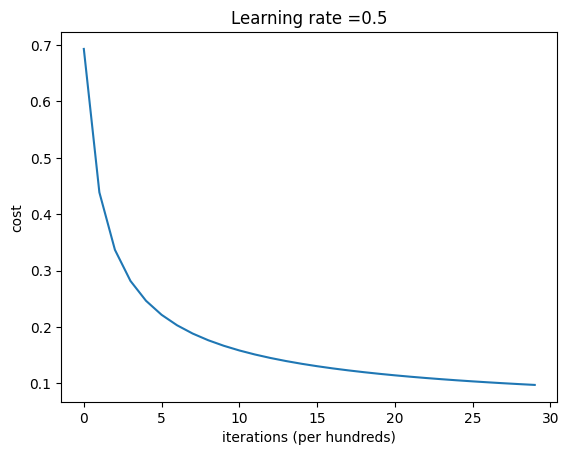

In [102]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

##Further analysis (optional/ungraded exercise) ##

Congratulations on building your first text classification model. Let's analyze it further, and examine possible choices for the learning rate $\alpha$.

learning rate is: 0.01
train accuracy: 84.8993288590604 %
test accuracy: 84.57330415754923 %

-------------------------------------------------------

learning rate is: 0.1
train accuracy: 96.08987452582434 %
test accuracy: 95.77680525164114 %

-------------------------------------------------------

learning rate is: 0.5
train accuracy: 98.54829296761015 %
test accuracy: 98.31509846827133 %

-------------------------------------------------------



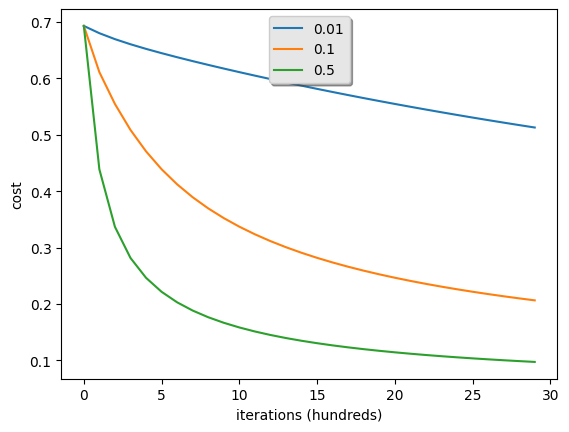

In [105]:
learning_rates = [0.01, 0.1, 0.5]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(xtrain_tfidf, train_y, xtest_tfidf, test_y, num_iterations = 3000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## 6 - Test with your own news




In [103]:
text = "Người đàn ông quốc tịch Nga đã bị cảnh sát bắt do tình nghi sát hại đồng hương, quấn thi thể trong nylon và nhiều lớp vải, phi tang ở chỗ vắng. Ngày 4/2, Công an Bình Thuận đã tạm giữ hình sự nghi can, song chưa công bố danh tính. Cảnh sát sau đó xác định nạn nhân là"

x_tfidf = tfidf_vect.transform([text]).T.toarray()

In [104]:
y, _ = predict(d["w"], d["b"], x_tfidf)
encoder.inverse_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['Pháp luật'], dtype=object)